In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
learning_rate = 0.01
training_epochs = 1000

In [3]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

In [4]:
x1 = np.random.normal(-4, 2, 1000)
x2 = np.random.normal(4, 2, 1000)
xs = np.append(x1, x2)
ys = np.asarray([0.] * len(x1) + [1.] * len(x2))

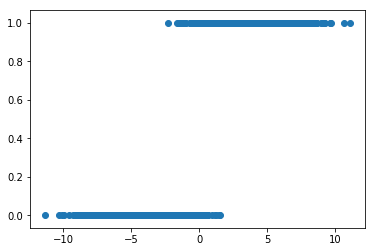

In [5]:
plt.scatter(xs, ys)
plt.show()

In [6]:
X = tf.placeholder(tf.float32, shape=(None,), name="x")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")

In [7]:
w = tf.Variable([0., 0.], name="parameter", trainable=True)

In [8]:
y_model = tf.sigmoid(w[1] * X + w[0])

In [9]:
cost = tf.reduce_mean(-Y * tf.log(y_model) - (1-Y) * tf.log(1-y_model))

In [10]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], {X: xs, Y: ys})
        print(epoch, err)
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err
    w_val = sess.run(w, {X: xs, Y: ys})

0 0.6931461
1 0.6546695
2 0.61990136
3 0.5884594
4 0.5599856
5 0.53415364
6 0.51066864
7 0.48926738
8 0.46971667
9 0.45181087
10 0.43536922
11 0.4202332
12 0.40626365
13 0.39333886
14 0.38135183
15 0.37020886
16 0.35982695
17 0.3501336
18 0.3410645
19 0.33256245
20 0.3245771
21 0.31706342
22 0.3099814
23 0.30329525
24 0.296973
25 0.29098576
26 0.2853076
27 0.27991527
28 0.2747876
29 0.26990554
30 0.2652517
31 0.26081038
32 0.25656715
33 0.25250888
34 0.24862364
35 0.24490039
36 0.24132907
37 0.23790042
38 0.23460592
39 0.23143768
40 0.22838846
41 0.2254515
42 0.2226206
43 0.21988998
44 0.21725427
45 0.21470857
46 0.21224807
47 0.20986862
48 0.20756608
49 0.2053367
50 0.20317695
51 0.20108353
52 0.19905336
53 0.19708346
54 0.1951712
55 0.193314
56 0.19150934
57 0.18975507
58 0.18804897
59 0.18638906
60 0.18477339
61 0.18320021
62 0.18166776
63 0.18017444
64 0.17871869
65 0.17729916
66 0.17591436
67 0.17456302
68 0.17324387
69 0.17195581
70 0.17069763
71 0.16946836
72 0.16826692
73 0.167

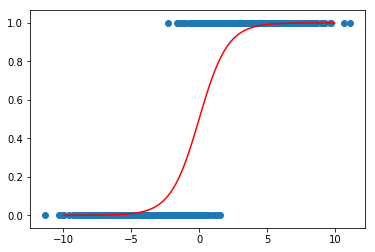

In [12]:
all_xs = np.linspace(-10, 10, 100)
plt.scatter(xs, ys)
plt.plot(all_xs, sigmoid((all_xs * w_val[1] + w_val[0])), 'r')
plt.show()